# MuTe: Raspberry Pi Trigger

Evaluation of the Raspberry Pi response for different frequencies of trigger. The test was made through the PIN 0 (GPIO) and the frecuencies were from 100 Hz to 6400 Hz.

This test take part of the trigger configuration for the MuTe detector. The trigger system is made in three steps: first one, an asynchronous self-trigger in each MAROC3 board (each panel) which occurs when an event is detected for the MAROC3 ASIC (that means, some SiPM signal reaches the discrimination threshold). The second one, is stablished by means of a Time-of-Flight (ToF) calculator; this module, implemented in a FPGA as a TDC system,  has two trigger signals as input (one for each scintillator panel) then calculates the difference in time between the trigger signals, and decides if the event is valid, that is, if the events occured in a determined time window.

Finally, the third trigger is made offline. The data is processed loking for single events in each panel (only one column and one row should be fired in each panel).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

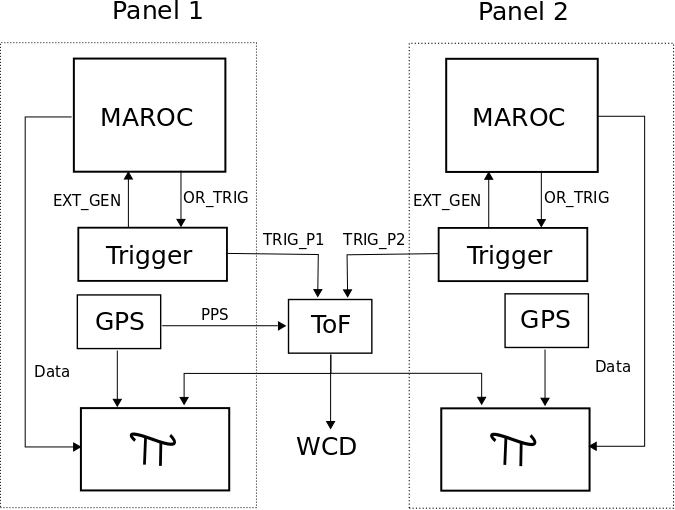

In [2]:
from IPython.display import Image
Image(filename='Trigger.png')

### Computing of the time window for the second trigger

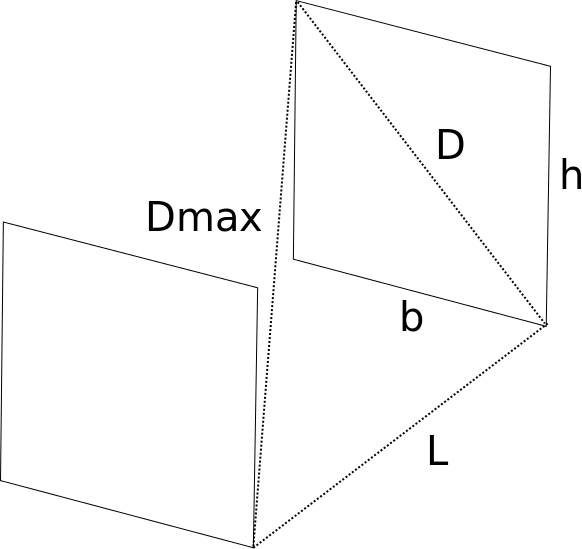

In [3]:
from IPython.display import Image
Image(filename='Dmax.png', width=400)

$$D = \sqrt{b^2 + h^2}$$

$$dmax = \sqrt{L^2 + D^2}$$

In [4]:
b = 120.0
h = 120.0
L = 250.0
D = np.sqrt(b**2 + h**2)
Dmax = np.sqrt(L**2 + D**2)

print 'The maximum distance a muon should pass is =  ' + str(Dmax) + ' cm'

The maximum distance a muon should pass is =  302.15889859476255 cm


The muon speed is near to the light speed ($c \approx 3e10$ cm/s). Taking that in account, the time is wated by a muon passing through the detector panels is

$$t = \frac{Dmax}{c}$$

In [5]:
c = 3e10

tmax = Dmax/c

print 'The maximum time a muon should pass is =  ' + str(tmax*1e9) + ' ns'

The maximum time a muon should pass is =  10.071963286492085 ns


The time window is stablishes as the maximum time plus its twenty percent

In [6]:
TW = tmax + 0.2*tmax

print 'The time window for the second trigger is =  ' + str(TW*1e9) + ' ns'

The time window for the second trigger is =  12.086355943790503 ns


# RPI trigger test

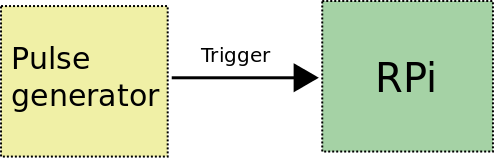

In [7]:
from IPython.display import Image
Image(filename='TriggerTest.png', width=600)

The trigger in the RPi is made through an interrupt process, this task was carried out by the WiringPi library coded in C++ (http://wiringpi.com/). Some problems were find at begining for the library version, the fuctional one is the v-2.44.

In [8]:
init_v = np.linspace(200,3000,15)
fin_v = [3100, 3200, 3300, 3400, 3600, 3700, 3800, 4000, 4800, 4900, 5200, 5600, 6400]

In [9]:
trig = np.concatenate((init_v, (np.asarray(fin_v)).T), axis=0)
trig

array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600., 1800.,
       2000., 2200., 2400., 2600., 2800., 3000., 3100., 3200., 3300.,
       3400., 3600., 3700., 3800., 4000., 4800., 4900., 5200., 5600.,
       6400.])

In [10]:
resp = [3098, 3195, 3295, 3395, 3585, 3684, 3785, 3983, 4775, 4873, 5160, 5540, 6295]
out = np.concatenate((init_v, (np.asarray(resp)).T), axis=0)
out

array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600., 1800.,
       2000., 2200., 2400., 2600., 2800., 3000., 3098., 3195., 3295.,
       3395., 3585., 3684., 3785., 3983., 4775., 4873., 5160., 5540.,
       6295.])

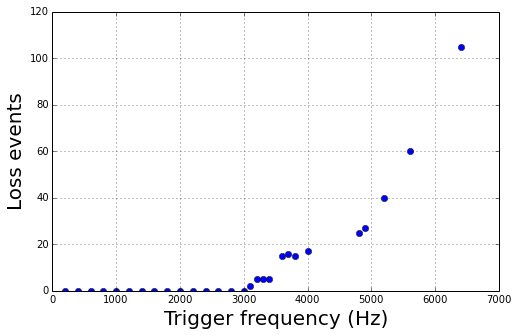

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(trig, np.subtract(trig,out),'ob')
plt.ylabel(r'Loss events', fontsize = 20)
plt.xlabel('Trigger frequency (Hz)', fontsize = 20)
plt.grid()